# Polyelectrolyte systems

In [1]:
using Clapeyron
import PyPlot; const plt = PyPlot

PyPlot

## Effect of PAA on the solubility of calcium carbonate
Assuming we have a very high pH, we can model poly acrylic acid as being fully charged. To model this polyelectrolyte, we need to use an approach capable of handling such species. The only model currently available in Clapeyron is SAFT-$\gamma$ Mie.

This is a group contribution approach where species are assembled from constituent groups. Let's say we want to assemble a 16-mer PAA:

In [40]:
N = 16
ions = [("calcium",["Ca2+"=>1]),
    ("carbonate",["CO32-"=>1]),
    ("sodium",["Na+"=>1]),
    ("PAA-",["COO-"=>N,"CH2"=>N-1,"CH3"=>2])]

solvent = [("water",["H2O"=>1])];

We can then assemble the model as we did previously:

In [41]:
fluid = SAFTgammaEMie(solvent,ions; charges=(;
            charge=[0,2,-2,1,-N]
            ))

solid = SolidKs(["calcium.carbonate"])

mapping = [(("calcium",1),("carbonate",1))=>(("calcium.carbonate",1))]

model = CompositeModel(["water","calcium","carbonate","sodium","PAA-"]; fluid = fluid, solid = solid, mapping = mapping)

Composite Model with 5 components:
 "water"
 "calcium"
 "carbonate"
 "sodium"
 "PAA-"
Solid Model: SolidKs("calcium.carbonate")
Fluid Model: ESElectrolyte{BasicIdeal, SAFTgammaMie{BasicIdeal, Float64}, GCMSABorn{Schreckenberg}}("water", "calcium", "carbonate", "sodium", "PAA-")

We can then define the salts to make it easier to handle the composition of the various species:

In [9]:
salts = [("NaPAA",["sodium"=>N,"PAA-"=>1]),
         ("CaCO3",["calcium"=>1,"carbonate"=>1])]

2-element Vector{Tuple{String, Vector{Pair{String, Int64}}}}:
 ("NaPAA", ["sodium" => 16, "PAA-" => 1])
 ("CaCO3", ["calcium" => 1, "carbonate" => 1])

From here, we can obtain our solubility of calcium carbonate the same way we did previously:

In [32]:
m = exp10.(LinRange(-5,-1,100))

p = 1e5
T = 298.15

ppmCaCO3 = zeros(length(m))

for i in 1:length(m)
    z = molality_to_composition(model.fluid, salts, [m[i],0.])
    ppmCaCO3[i] = sle_solubility(model, p, T, z; solute=["calcium.carbonate"], x0 = [-7.])[2]*1e6
end

Plotting:

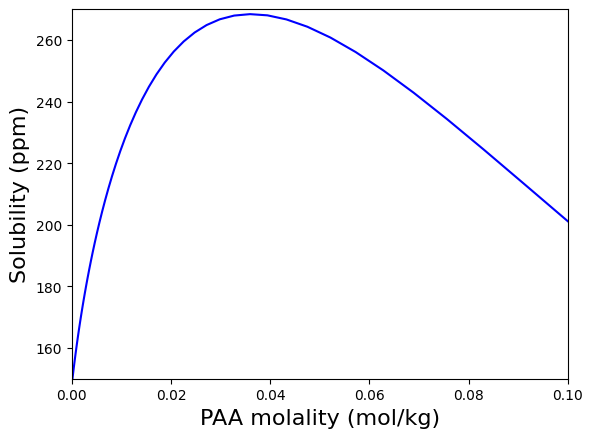

(150.0, 270.0)

In [38]:
plt.clf()
fig, ax = plt.subplots()
ax.plot(m, ppmCaCO3, color="blue")
ax.set_xlabel("PAA molality (mol/kg)", fontsize=16)
ax.set_ylabel("Solubility (ppm)", fontsize=16)
ax.set_xlim(0,0.1)
ax.set_ylim(150, 270)


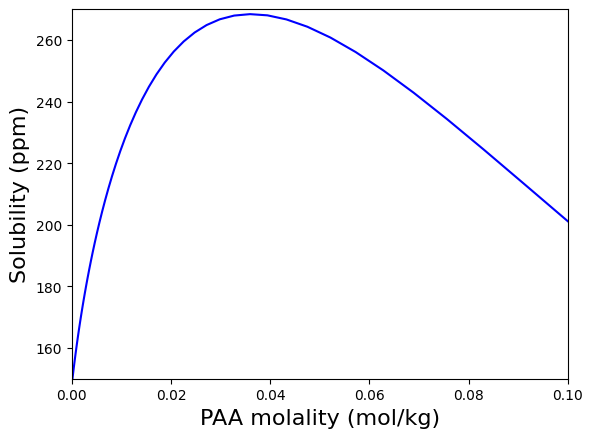

In [42]:
display(fig)